In [1]:
import spacy
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Named Entity Recognition

In [10]:
# same function in test_eda.ipynb so need to put this in one place in the the scripts
def chapter_order(filename):

    book_number = filename.split('_')[0]
    chapter_number = filename.split('_')[2].zfill(2)
    new_name = book_number + '.' + chapter_number
    
    return new_name

In [11]:
# Combine all chapters to one list of chapter text
# one element of the list = one chapter
# Just like text_sentiment_analysis.ipynb

mb_dir = '../2_Text_Preprocessing/TMBD_Chapters_lemma'

mb_chapter_texts = {}

for filename in os.listdir(mb_dir):
    filepath =  os.path.join(mb_dir, filename)
    with open(filepath, 'r', encoding='utf-8') as chapter_file:
        chapter_text = chapter_file.read()
        mb_chapter_texts[chapter_order(filename)] = chapter_text

In [14]:
# Combine all chapters to one list of chapter text
# one element of the list = one chapter
# same as test_sentiment_analysis.ipynb

ir_dir = '../2_Text_Preprocessing/IR_Chapters_lemma'

ir_chapter_texts = {}

for filename in os.listdir(ir_dir):
    filepath =  os.path.join(ir_dir, filename)
    with open(filepath, 'r', encoding='utf-8') as chapter_file:
        chapter_text = chapter_file.read()
        ir_chapter_texts[chapter_order(filename)] = chapter_text

first tried to convert the whole series into one string but it exceeded the model max_length so then separated in chapters.

In [16]:
mb_nlp = spacy.load("en_core_web_sm")
mb_ents = {}

for name, text in mb_chapter_texts.items():
    mb_doc = mb_nlp(text)
    mb_ents[name] = [(ent.text, ent.label_) for ent in mb_doc.ents]

print(mb_ents)

{'3.03': [('two', 'CARDINAL'), ('one two', 'CARDINAL'), ('hirune hirune', 'ORG'), ('entrys log', 'PERSON'), ('miki', 'PERSON'), ('four', 'CARDINAL'), ('two', 'CARDINAL'), ('one', 'CARDINAL'), ('miki', 'ORG'), ('miki', 'ORG'), ('miki', 'ORG'), ('hirune stow', 'ORG'), ('miki', 'PERSON'), ('one', 'CARDINAL'), ('two', 'CARDINAL'), ('miki', 'ORG'), ('miki', 'ORG'), ('miki', 'PERSON'), ('miki', 'ORG'), ('miki miki', 'PERSON'), ('miki hirune', 'PERSON'), ('miki', 'PERSON'), ('miki', 'PERSON'), ('one', 'CARDINAL'), ('miki', 'PERSON'), ('one', 'CARDINAL'), ('miki', 'PERSON'), ('miki', 'PERSON'), ('miki', 'PERSON'), ('miki', 'PERSON'), ('miki remember', 'PERSON'), ('miki', 'PERSON'), ('2 percent', 'PERCENT'), ('two', 'CARDINAL'), ('two', 'CARDINAL'), ('miki', 'PERSON'), ('miki', 'PERSON')], '4.02': [('one', 'CARDINAL'), ('four hours', 'TIME'), ('first', 'ORDINAL'), ('haveratton', 'ORG'), ('jian parthalos', 'PERSON'), ('first', 'ORDINAL'), ('two', 'CARDINAL'), ('four', 'CARDINAL'), ('five', 'CARD

In [17]:
ir_nlp = spacy.load("en_core_web_sm")
ir_ents = {}

for name, text in ir_chapter_texts.items():
    ir_doc = ir_nlp(text)
    ir_ents[name] = [(ent.text, ent.label_) for ent in ir_doc.ents]

print(ir_ents)

{'2.08': [('8', 'CARDINAL'), ('four meters', 'QUANTITY'), ('half dozen', 'CARDINAL'), ('second', 'ORDINAL'), ('one', 'CARDINAL'), ('yellowgreen', 'DATE'), ('second', 'ORDINAL'), ('fosyfs', 'ORG'), ('twenty years', 'DATE'), ('utensil', 'GPE'), ('first', 'ORDINAL'), ('id last centuries ago', 'DATE'), ('three', 'CARDINAL'), ('seven', 'CARDINAL'), ('toren', 'PERSON'), ('one', 'CARDINAL'), ('one', 'CARDINAL'), ('one', 'CARDINAL'), ('athoeki xhai', 'PERSON'), ('athoeki', 'PERSON'), ('xhai', 'GPE'), ('year', 'DATE'), ('one', 'CARDINAL'), ('days', 'DATE'), ('five', 'CARDINAL'), ('hetnys', 'TIME'), ('dozens', 'CARDINAL'), ('utensil', 'GPE'), ('first', 'ORDINAL'), ('three', 'CARDINAL'), ('one two', 'CARDINAL'), ('two', 'CARDINAL'), ('fifteen twenty years ago', 'DATE'), ('five', 'CARDINAL'), ('one', 'CARDINAL'), ('one', 'CARDINAL'), ('four', 'CARDINAL'), ('two thousand years', 'DATE'), ('one', 'CARDINAL'), ('three', 'CARDINAL'), ('concourse fosyfs', 'PERSON'), ('today', 'DATE'), ('morning', 'TIME

In [19]:
mb_people_dict = {}
mb_org_dict = {}
mb_loc_dict = {}

for name, ents in mb_ents.items():
    mb_people_dict[name] = []
    mb_org_dict[name] = []
    mb_loc_dict[name] = []
    for ent in ents:
        if ent[1] == 'PERSON' and ent[0] not in mb_people_dict[name]:
            mb_people_dict[name].append(ent[0])
        elif ent[1] == 'ORG' and ent[0] not in mb_org_dict[name]:
            mb_org_dict[name].append(ent[0])
        elif ent[1] == 'LOC' and ent[0] not in mb_loc_dict[name]:
            mb_loc_dict[name].append(ent[0])


In [21]:
ir_people_dict = {}
ir_org_dict = {}
ir_loc_dict = {}

for name, ents in ir_ents.items():
    ir_people_dict[name] = []
    ir_org_dict[name] = []
    ir_loc_dict[name] = []
    for ent in ents:
        if ent[1] == 'PERSON' and ent[0] not in ir_people_dict[name]:
            ir_people_dict[name].append(ent[0])
        elif ent[1] == 'ORG' and ent[0] not in ir_org_dict[name]:
            ir_org_dict[name].append(ent[0])
        elif ent[1] == 'LOC' and ent[0] not in ir_loc_dict[name]:
            ir_loc_dict[name].append(ent[0])


In [27]:
mb_people_list = ''

for key, name in mb_people_dict.items():
    mb_people_list = mb_people_list + ' ' + ' '.join(name)

mb_people_list = mb_people_list.split()

In [29]:
mb_unique_people = []

for person in mb_people_list:
    if person not in mb_unique_people:
        mb_unique_people.append(person)

mb_unique_people[:10]

['entrys',
 'log',
 'miki',
 'hirune',
 'remember',
 'jian',
 'parthalos',
 'milu',
 'graycris',
 'haveratton']

In [30]:
ir_people_list = ''

for key, name in ir_people_dict.items():
    ir_people_list = ir_people_list + ' ' + ' '.join(name)

ir_people_list = ir_people_list.split()

In [31]:
ir_unique_people = []

for person in ir_people_list:
    if person not in ir_unique_people:
        ir_unique_people.append(person)

ir_unique_people[:10]

['toren',
 'athoeki',
 'xhai',
 'concourse',
 'fosyfs',
 'calmer',
 'kalr',
 'seivarden',
 'hetnyss',
 'god']

<Axes: >

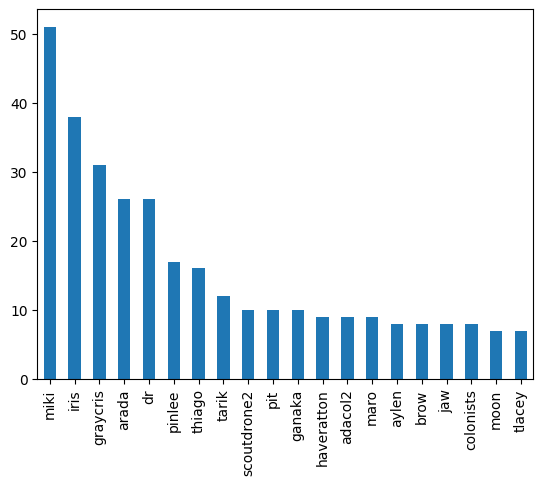

In [34]:
mb_people_series = pd.Series(mb_people_list)
mb_people_series.value_counts().head(20).plot(kind='bar')

interesting that mensah and ratthi aren't here. art neither. 

In [36]:
'art' in mb_people_list, 'mensah' in mb_people_list, 'ratthi' in mb_people_list

(True, True, True)

so all three are recognised as people atleast.

In [38]:
mb_people_series.value_counts()['art'], mb_people_series.value_counts()['mensah'], mb_people_series.value_counts()['ratthi'] 

(3, 3, 4)

very interesting.

What if we took all counts? not just unique entries from chapters?

In [49]:
new_mb_people_list = []

for name, ents in mb_ents.items():
    for ent in ents:
        if ent[1] == 'PERSON':
            new_mb_people_list.append(ent[0])

    

Lets see now

<Axes: >

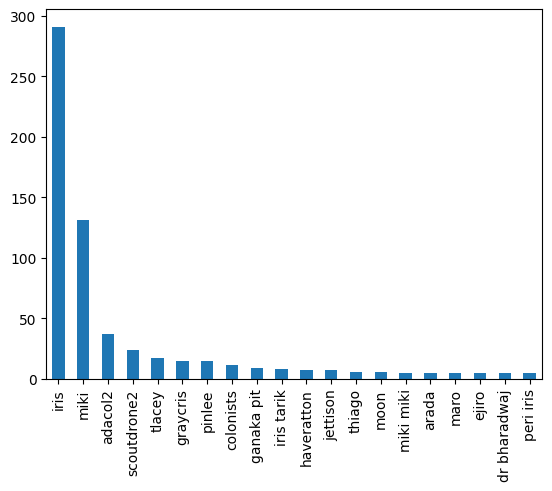

In [50]:
new_mb_people_series = pd.Series(new_mb_people_list)

new_mb_people_series.value_counts().head(20).plot(kind='bar')

In [51]:
new_mb_people_series.value_counts()['art']

1

Huh. this is the opposite of what i thought would happen. and mensah and ratthi aren't even there. 

In [52]:
len(mb_people_list), len(new_mb_people_list)

(702, 905)

so there are definitely more words but not... oh i see. i think i know where i went wrong.

In [53]:
new_mb_people_list = []

for name, ents in mb_ents.items():
    for ent in ents:
        if ent[1] == 'PERSON':
            new_mb_people_list.append(ent[0])

# making sure we are plotting word frequencies of the people.
new_mb_people_list = ' '.join(new_mb_people_list).split()

<Axes: >

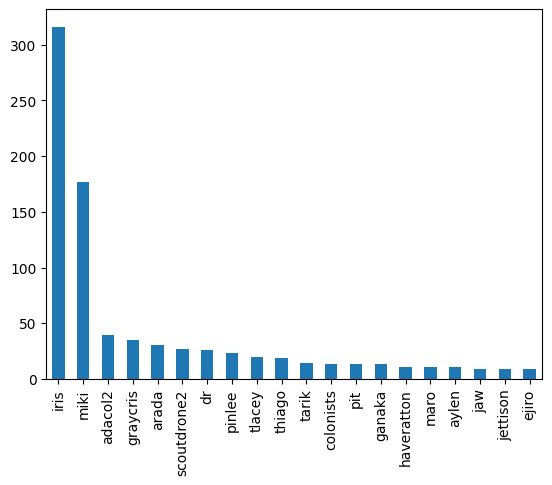

In [54]:
new_mb_people_series = pd.Series(new_mb_people_list)

new_mb_people_series.value_counts().head(20).plot(kind='bar')

In [55]:
new_mb_people_series.value_counts()['art'], new_mb_people_series.value_counts()['mensah'], new_mb_people_series.value_counts()['ratthi']

(3, 3, 4)

no difference in counts. though the top 20 did change

though miki and iris being at the top with such a huge margin is a little suspicious to me. iris maybe understandable given she was in two of the longest books but miki? and mensah, art and ratthi being so far down is suspicious too.

Maybe trying this with preserved sentence structure would improve accuracy? let's try that

In [56]:
# Combine all chapters to one list of chapter text
# one element of the list = one chapter
# Just like text_sentiment_analysis.ipynb

mb_dir = '../2_Text_Preprocessing/TMBD_Chapters_sent_lemma'

mb_chapter_texts = {}

for filename in os.listdir(mb_dir):
    filepath =  os.path.join(mb_dir, filename)
    with open(filepath, 'r', encoding='utf-8') as chapter_file:
        chapter_text = chapter_file.read()
        mb_chapter_texts[chapter_order(filename)] = chapter_text


# Combine all chapters to one list of chapter text
# one element of the list = one chapter
# same as test_sentiment_analysis.ipynb

ir_dir = '../2_Text_Preprocessing/IR_Chapters_sent_lemma'

ir_chapter_texts = {}

for filename in os.listdir(ir_dir):
    filepath =  os.path.join(ir_dir, filename)
    with open(filepath, 'r', encoding='utf-8') as chapter_file:
        chapter_text = chapter_file.read()
        ir_chapter_texts[chapter_order(filename)] = chapter_text

In [57]:
mb_nlp = spacy.load("en_core_web_sm")
mb_ents = {}

for name, text in mb_chapter_texts.items():
    mb_doc = mb_nlp(text)
    mb_ents[name] = [(ent.text, ent.label_) for ent in mb_doc.ents]


mb_people_dict = {}
mb_org_dict = {}
mb_loc_dict = {}

for name, ents in mb_ents.items():
    mb_people_dict[name] = []
    mb_org_dict[name] = []
    mb_loc_dict[name] = []
    for ent in ents:
        if ent[1] == 'PERSON' and ent[0] not in mb_people_dict[name]:
            mb_people_dict[name].append(ent[0])
        elif ent[1] == 'ORG' and ent[0] not in mb_org_dict[name]:
            mb_org_dict[name].append(ent[0])
        elif ent[1] == 'LOC' and ent[0] not in mb_loc_dict[name]:
            mb_loc_dict[name].append(ent[0])


In [58]:
ir_nlp = spacy.load("en_core_web_sm")
ir_ents = {}

for name, text in ir_chapter_texts.items():
    ir_doc = ir_nlp(text)
    ir_ents[name] = [(ent.text, ent.label_) for ent in ir_doc.ents]


ir_people_dict = {}
ir_org_dict = {}
ir_loc_dict = {}

for name, ents in ir_ents.items():
    ir_people_dict[name] = []
    ir_org_dict[name] = []
    ir_loc_dict[name] = []
    for ent in ents:
        if ent[1] == 'PERSON' and ent[0] not in ir_people_dict[name]:
            ir_people_dict[name].append(ent[0])
        elif ent[1] == 'ORG' and ent[0] not in ir_org_dict[name]:
            ir_org_dict[name].append(ent[0])
        elif ent[1] == 'LOC' and ent[0] not in ir_loc_dict[name]:
            ir_loc_dict[name].append(ent[0])


<Axes: >

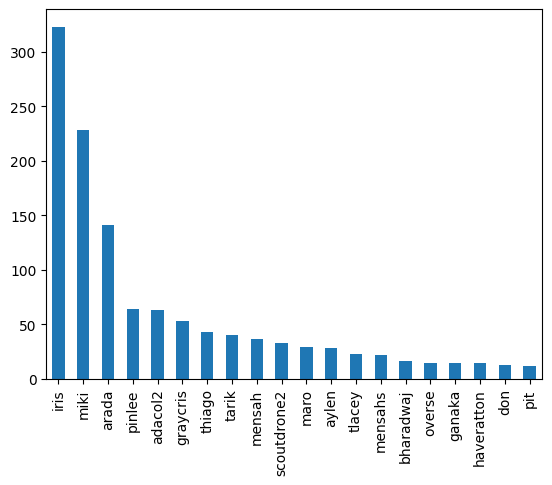

In [59]:
new_mb_people_list = []

for name, ents in mb_ents.items():
    for ent in ents:
        if ent[1] == 'PERSON':
            new_mb_people_list.append(ent[0])

# making sure we are plotting word frequencies of the people.
new_mb_people_list = ' '.join(new_mb_people_list).split()

new_mb_people_series = pd.Series(new_mb_people_list)

new_mb_people_series.value_counts().head(20).plot(kind='bar')


In [60]:
new_mb_people_series.value_counts()['art'], new_mb_people_series.value_counts()['mensah'], new_mb_people_series.value_counts()['ratthi']

(8, 37, 11)

whoohoo! definitely a difference now. atleast for mensah. but i still find the high occurences of miki suspicious. 

so if you search for miki in book 3 (the only book it makes an appearance in) you get 144 matches. while we are getting more than 200 occurences here. even keeping in mind that miki gets mentioned a few times in the later books thats a lot. whats going on?

so i see whats happening. lets do another thing.

In [62]:
mb_ents['3.05']

[('miki', 'PERSON'),
 ('miki', 'PERSON'),
 ('miki', 'PERSON'),
 ('miki', 'PERSON'),
 ('graycris', 'PERSON'),
 ('geo pod', 'PRODUCT'),
 ('one', 'CARDINAL'),
 ('miki', 'ORG'),
 ('wilken', 'ORG'),
 ('miki miki', 'PERSON'),
 ('miki', 'ORG'),
 ('brais abene', 'PERSON'),
 ('second', 'ORDINAL'),
 ('at least one', 'CARDINAL'),
 ('three seconds', 'TIME'),
 ('tlacey', 'PERSON'),
 ('five more seconds', 'TIME'),
 ('miki', 'PERSON'),
 ('miki', 'PERSON'),
 ('miki', 'ORG'),
 ('nowi', 'PERSON'),
 ('don', 'PERSON'),
 ('wilken', 'PERSON'),
 ('wilken', 'ORG'),
 ('scan', 'GPE'),
 ('miki', 'PERSON'),
 ('wilkens scan', 'PERSON'),
 ('miki', 'PERSON'),
 ('second', 'ORDINAL'),
 ('graycris', 'PERSON'),
 ('graycris', 'PERSON'),
 ('five seconds', 'TIME'),
 ('scan', 'NORP'),
 ('miki', 'PERSON'),
 ('three', 'CARDINAL'),
 ('three quarters', 'CARDINAL'),
 ('third', 'ORDINAL'),
 ('miki', 'PERSON'),
 ('miki', 'PERSON'),
 ('miki', 'PERSON'),
 ('third', 'ORDINAL'),
 ('wilkens', 'PERSON'),
 ('miki', 'PERSON'),
 ('second',

In [63]:
mb_people_dict = {}

for name, ents in mb_ents.items():
    mb_people_dict[name] = []
    for ent in ents:
        if ent[1] == 'PERSON':
            # so making sure that variations of miki don't get count
            for word in ent[0].split():
                if word not in mb_people_dict[name]:
                    mb_people_dict[name].append(word)
        

<Axes: >

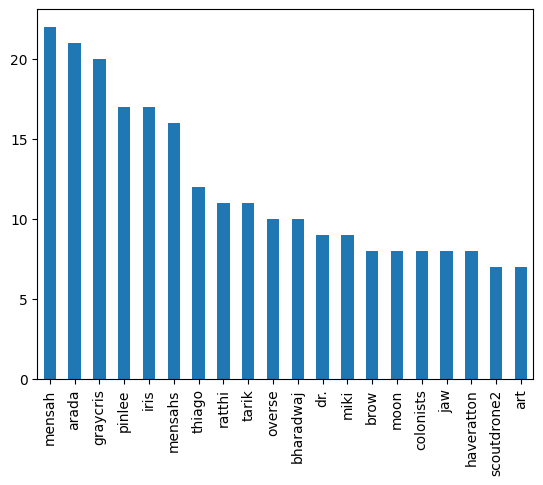

In [65]:
mb_people_list = []

for key, value in mb_people_dict.items():
    for word in value:
        mb_people_list.append(word)

mb_people_series = pd.Series(mb_people_list)

mb_people_series.value_counts().head(20).plot(kind='bar')

yess! so what we were doing wrong was that there were too many entities being recognised that included "miki" as a substring. then we joined and resplit them to get indiviual words which populated the list with too many "miki"s. now we see mensah, ratthi and even art making the top 20. 